# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.14/dataset/iris.csv')

In [6]:
target_col = 'variety'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
threshold_corr = 0.95

In [11]:
threshold_model = 5

In [12]:
threshold_score = 0.7

In [13]:
threshold_feature = 5

#### Drop user's columns:

In [14]:
user_drop_cols = []

Dataset before deletion

In [15]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [16]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [17]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataset copy

In [18]:
df_copy = df.copy()

### Dataset Information

In [19]:
df.shape

(150, 5)

#### Some records

In [20]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

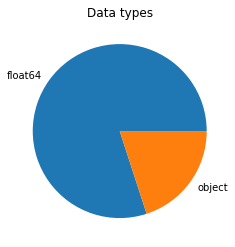

In [21]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [22]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

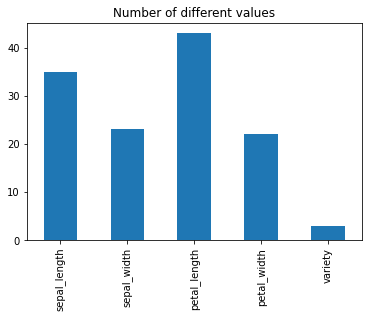

In [23]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [24]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop NaN:

In [25]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [26]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [27]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [28]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: sepal_length
Encoding numeric column: sepal_width
Encoding numeric column: petal_length
Encoding numeric column: petal_width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

##### Imputation

In [29]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [30]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

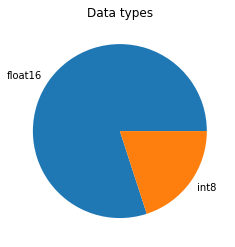

In [31]:
plot_dataframe_structure(df)

#### Outliers:

In [32]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Correlation

In [33]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,variety
sepal_length,1.000000,-0.117791,0.875198,0.819831,0.785156
sepal_width,-0.117791,1.000000,-0.417683,-0.357280,-0.416882
petal_length,0.875198,-0.417683,1.000000,0.962691,0.948489
petal_width,0.819831,-0.357280,0.962691,1.000000,0.956268
variety,0.785156,-0.416882,0.948489,0.956268,1.000000


In [34]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

#### Check columns that should be dropped

In [35]:
print(dropped_cols)

['petal_width']


## Splittings 

In [36]:
df = df_copy

#### Splitting dataframe in features and targets

In [37]:
y = df[target_col]

In [38]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [39]:
nb_features = len(X.columns.tolist())

In [40]:
nb_targets = len(y.unique())

In [41]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [42]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

##### Encoding

In [43]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [44]:
cat_selector = make_column_selector(dtype_include=object)

In [45]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [46]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [47]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [48]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [49]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [50]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [51]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [52]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini'))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy'))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('MLPC10', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPC20', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ]

##### Level-1 model

In [53]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [54]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [55]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 4.38 s, sys: 86.2 ms, total: 4.47 s
Wall time: 21.9 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f9b87d340>),
                                                                                                  ('pipeline-2...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f9b87b400>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

### Model evaluation

#### Model scoring

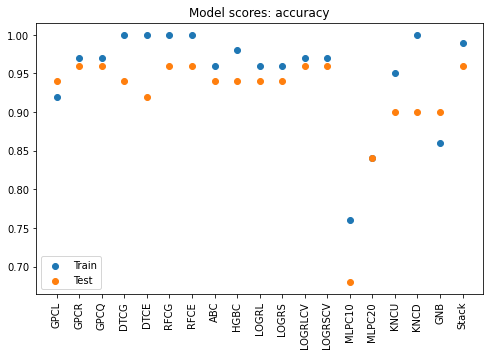

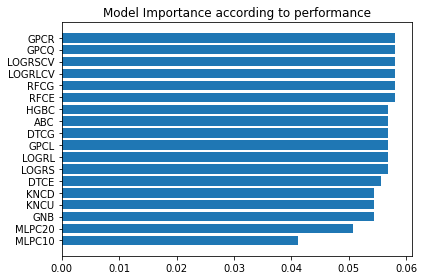

In [56]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

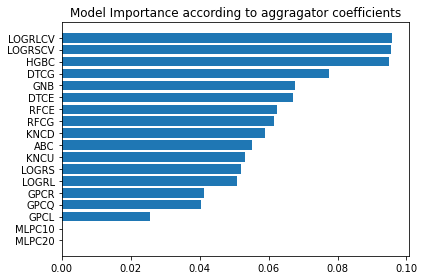

In [57]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

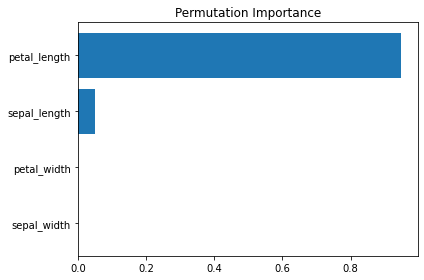

array([['sepal_width', 0.0],
       ['petal_width', 0.0],
       ['sepal_length', 0.051051051051051004],
       ['petal_length', 0.9489489489489491]], dtype=object)

In [58]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [59]:
features_of_interest = []

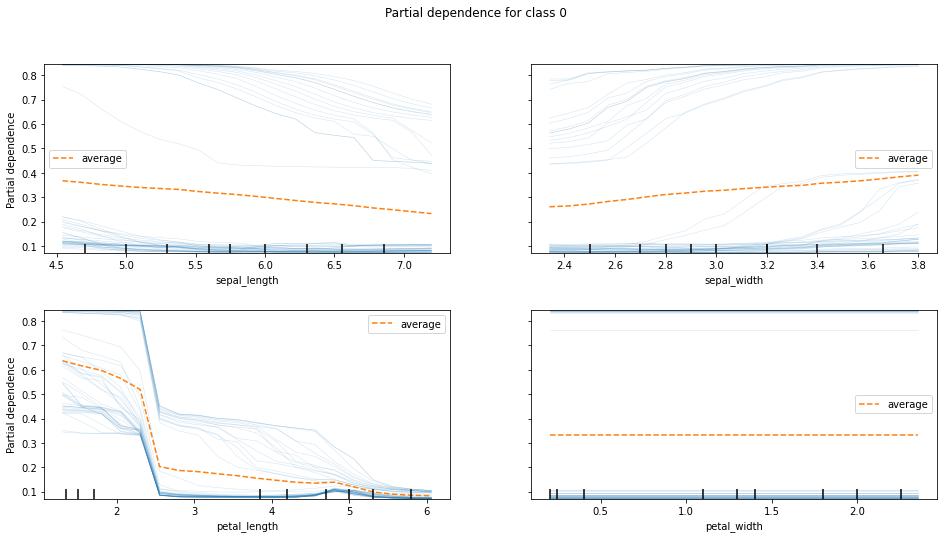

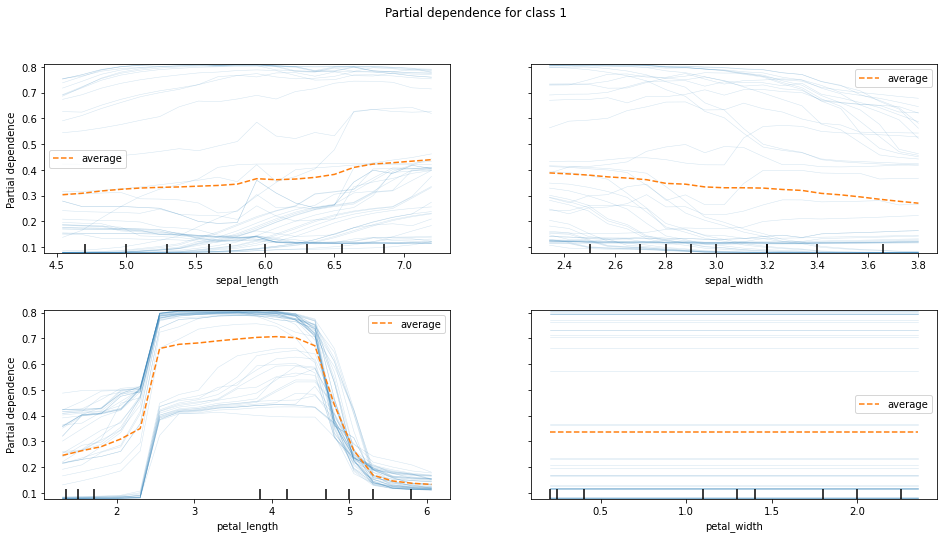

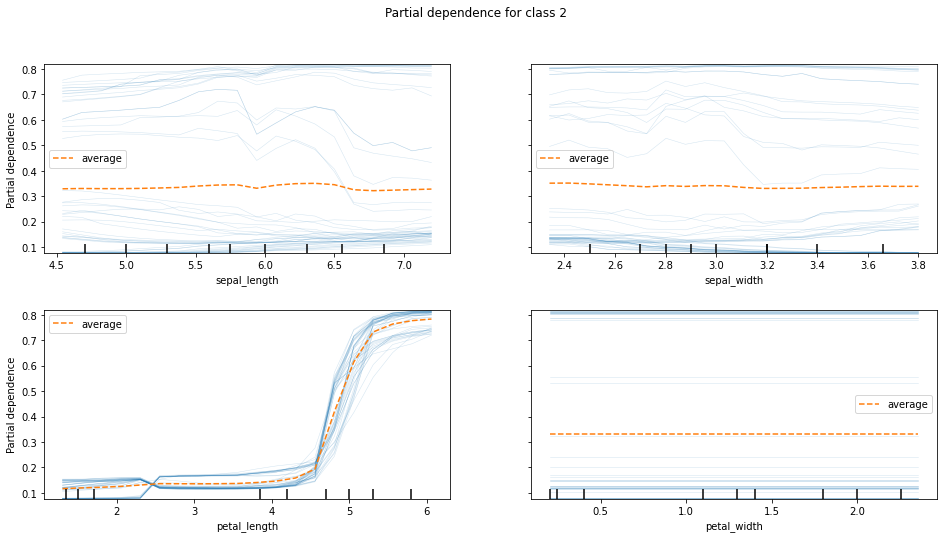

In [60]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Classification report

In [61]:
K_classification_report(model, X_train, y_train, X_test, y_test)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,33.000000
1,1.000000,0.970588,0.985075,34.000000
2,0.970588,1.000000,0.985075,33.000000
accuracy,0.990000,0.990000,0.990000,0.990000
macro avg,0.990196,0.990196,0.990050,100.000000
weighted avg,0.990294,0.990000,0.990000,100.000000


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,17.000000
1,0.937500,0.937500,0.937500,16.000000
2,0.941176,0.941176,0.941176,17.000000
accuracy,0.960000,0.960000,0.960000,0.960000
macro avg,0.959559,0.959559,0.959559,50.000000
weighted avg,0.960000,0.960000,0.960000,50.000000


#### Confusion matrix

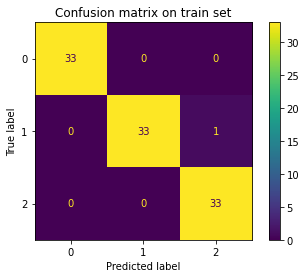

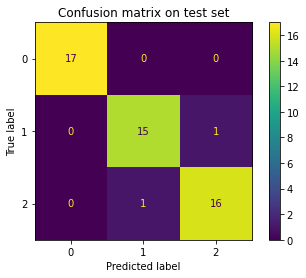

In [62]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

### Final Model

In [63]:
threshold_model = 5

In [64]:
threshold_score = 0.7

##### Filtered Level-0 models

In [65]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [66]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [67]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [68]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 1.35 s, sys: 74.5 ms, total: 1.42 s
Wall time: 5.15 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f9b87d340>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    S...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f9b87b400>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

#### Final Model scoring

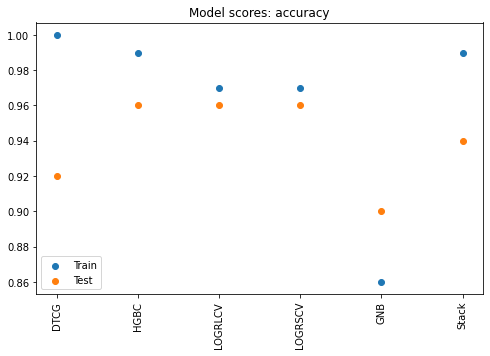

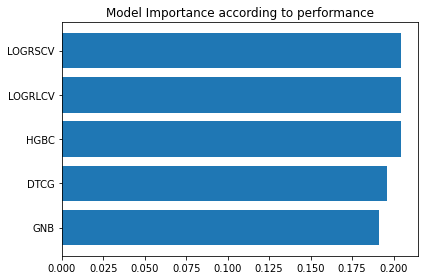

(array([['DTCG', 1.0, 0.92],
        ['HGBC', 0.99, 0.96],
        ['LOGRLCV', 0.97, 0.96],
        ['LOGRSCV', 0.97, 0.96],
        ['GNB', 0.86, 0.9],
        ['Stack', 0.99, 0.94]], dtype=object),
 array([['GNB', 0.19148936170212766],
        ['DTCG', 0.19574468085106383],
        ['HGBC', 0.20425531914893616],
        ['LOGRLCV', 0.20425531914893616],
        ['LOGRSCV', 0.20425531914893616]], dtype=object))

In [69]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

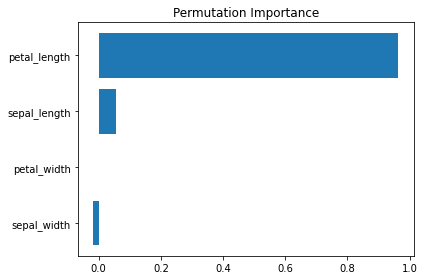

In [70]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [71]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [72]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [73]:
print(dropped_cols)

['petal_width']


#### Final Classification report

In [74]:
K_classification_report(model, X_train, y_train, X_test, y_test)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,33.000000
1,1.000000,0.970588,0.985075,34.000000
2,0.970588,1.000000,0.985075,33.000000
accuracy,0.990000,0.990000,0.990000,0.990000
macro avg,0.990196,0.990196,0.990050,100.000000
weighted avg,0.990294,0.990000,0.990000,100.000000


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,17.000000
1,0.882353,0.937500,0.909091,16.000000
2,0.937500,0.882353,0.909091,17.000000
accuracy,0.940000,0.940000,0.940000,0.940000
macro avg,0.939951,0.939951,0.939394,50.000000
weighted avg,0.941103,0.940000,0.940000,50.000000


#### Final Confusion matrix

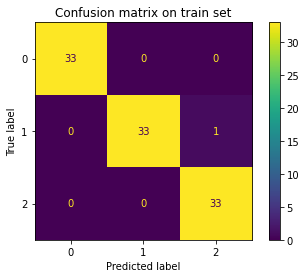

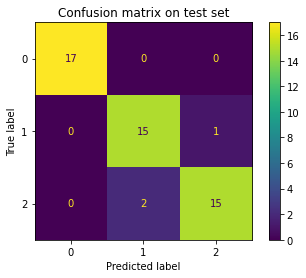

In [75]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [76]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [77]:
fastapi_server(model, 'model.sav', X, y)

### Start your server

In [ ]:
run server.py

INFO:     Started server process [7101]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


### Test your API at http://127.0.0.1:8000/docs